<a href="https://colab.research.google.com/github/2303A51954/application-of-datamining/blob/main/week%20_3%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

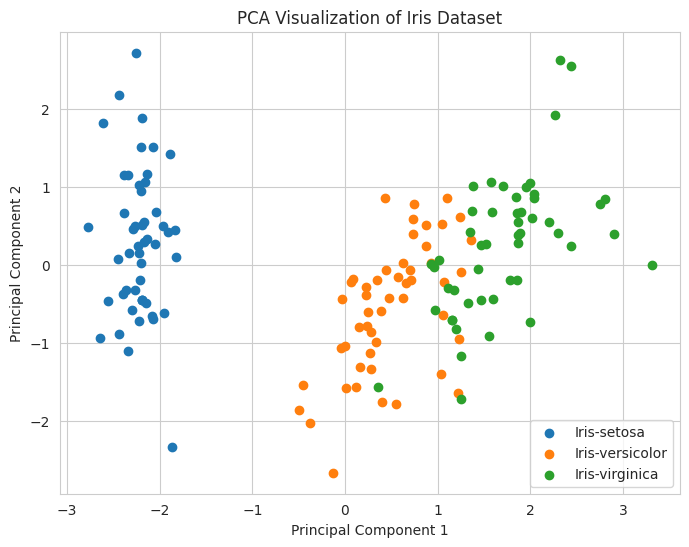

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/Iris.csv'
data = pd.read_csv(file_path)

# Drop non-numeric columns (e.g., 'Id' and 'Species' if present)
if 'Id' in data.columns:
    data = data.drop(columns=['Id'])
if 'Species' in data.columns:
    labels = data['Species']
    data = data.drop(columns=['Species'])
else:
    labels = None

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
if labels is not None:
    pca_df['Species'] = labels

# Visualization
plt.figure(figsize=(8, 6))
if labels is not None:
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(pca_df[pca_df['Species'] == label]['PC1'],
                    pca_df[pca_df['Species'] == label]['PC2'], label=label)
else:
    plt.scatter(pca_df['PC1'], pca_df['PC2'])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Iris Dataset')
plt.legend()
plt.show()